In [1]:
# Import Libraries
import pandas as pd
#import pyproj as ppj
import matplotlib.pyplot as plt
import math
import os
import sys
import seaborn as sns

In [2]:
# Declare folder
data_folder = os.path.abspath("DATA")
print(data_folder)
output_folder = os.path.abspath("output")
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

C:\Users\Danie\fellowship-work\NOAA\DATA


In [3]:
#Read CSV file
csv_file = "FireCount CO 1980-2016.csv"#SELECT STATE CSV FILE HERE
csv_file = os.path.join(data_folder, csv_file)
df = pd.read_csv(csv_file)
df = df[pd.notnull(df['Month'])]

In [4]:
csv_file = "TempCount CO 1980-2016.csv"#CHANGE STATE HERE TOO
csv_file = os.path.join(data_folder, csv_file)
df1 = pd.read_csv(csv_file)
df1 = df1[pd.notnull(df1['Month'])]

Text(0.5,1,'State of California, 2000')

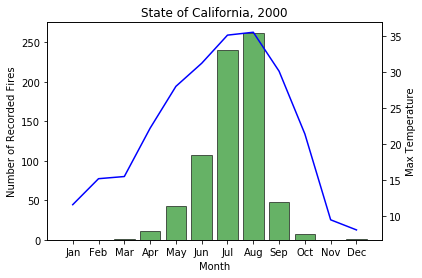

In [5]:
year='2000'#SELECT YEAR HERE
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
values = df[year].tolist()
for i in range(12):
    values[i]=int(values[i])
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(months,values,color='green',alpha=.6,linewidth=1,edgecolor='black')
ax2.plot(df1[year],color='blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Recorded Fires')
ax2.set_ylabel('Max Temperature')
plt.title('State of California, '+year)

In [ ]:
# THIS WILL GIVE YOU THE TYPE OF VARIABLES YOU HAVE
df.info()

In [96]:
# THIS COMMAND CHECKS FOR THE CORRELATON BETWEEN TWO VARIABLES
df['TotalAcres'].corr(df['Temp'])

0.0686226667570195

In [8]:
#PLOT TWO GRAPHS IN ONE - USE THIS FOR PLOTTING TEMP VS NUMBER OF FIRES EACH YR

ax = df["Slope"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Temp"].plot(kind='density', color='teal')
ax.set(xlabel='SLOPE')
plt.xlim(-10,85)
plt.show()

KeyError: 'Slope'

In [14]:
#THIS "DROPS" COLUMNS YOU MAY NOT NEED FOR ANALYSIS SO ONLY THE VARIABLES YOU SEE BELOW PLOT

df.drop(['code','month','day','year','Latitude','Longitude','Fire_Name','ClassRaster','ClassName'],axis=1).corr(method ='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,Aspect,Slope,Elevation,Temp,ClassValue
Aspect,1.0,-0.16,0.032,0.058,-0.15
Slope,-0.16,1.0,0.018,-0.012,-0.24
Elevation,0.032,0.018,1.0,0.27,-0.047
Temp,0.058,-0.012,0.27,1.0,0.028
ClassValue,-0.15,-0.24,-0.047,0.028,1.0


# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['Aspect','Slope','Elevation','Temp','ClassValue']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']

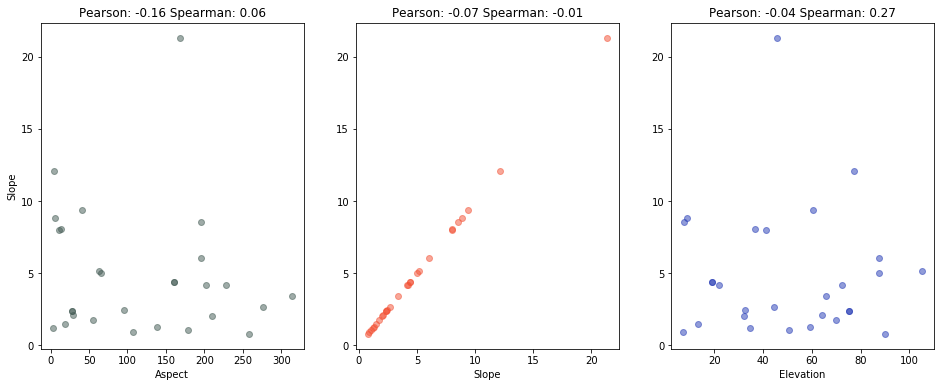

In [15]:
# THIS PLOT WILL GIVE YOU 3 TYPES OF CORRELATIONS - STUDY WHAT EACH ONE MEANS

plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['Aspect','Slope','Elevation','Temp','ClassValue']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('Slope')
    i.scatter(df[cols[j]], df['Slope'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%df.corr().loc[cols[j]]['ClassValue'].round(2)+' Spearman: %s'%df.corr(method='spearman').loc[cols[j]]['Temp'].round(2))
    j+=1

plt.show()